## 1. Análisis exploratorio (EDA):

In [199]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [201]:
print("\nValores nulos por columna:")
df.isnull().sum()


Valores nulos por columna:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [202]:
print("\nNúmero de filas duplicadas:", df.duplicated().sum())


Número de filas duplicadas: 0


In [203]:
# Variables categóricas
print("\nVariables categóricas:")
df.select_dtypes(include='object').columns.tolist()


Variables categóricas:


[]

No hay variables categóricas en principio, aunque algunas numéricas pueden ser categóricas


In [204]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
df.describe()


Estadísticas descriptivas:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Variables con posibles valores inválidos o sospechosos:** 

**Glucose (Glucosa)**

    Mínimo = 0 . Esto no es fisiológicamente válido. Una glucosa de 0 no es posible → los ceros deberían tratarse como valores faltantes (NaN).

**BloodPressure (Presión arterial)**

    Mínimo = 0 . También imposible: nadie tiene 0 mmHg de presión arterial diastólica y sigue vivo → otro caso de ceros como valores ausentes.

**SkinThickness (Grosor de pliegue cutáneo)**

    25% = 0 y mínimo = 0 . Esto puede indicar que muchas personas no se midieron → posible valor ausente codificado como 0.

**Insulin**

    Mínimo = 0, 25% = 0 . Más de un 25% tiene insulina en cero → lo mismo, deben tratarse como valores faltantes.

**BMI**

    Mínimo = 0 . Un índice de masa corporal (IMC) de 0 es biológicamente inviable.

In [237]:
import numpy as np

# Columnas con ceros sospechosos
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Mostrar cuántos ceros había originalmente
print("🔍 Valores 0 antes del reemplazo:")
for col in cols_with_zeros:
    count_zeros = (df[col] == 0).sum()
    print(f"{col}: {count_zeros} ceros")

# Reemplazar los ceros por NaN
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Mostrar cuántos NaN hay ahora
print("\n Valores NaN después del reemplazo:")
print(df[cols_with_zeros].isnull().sum())


🔍 Valores 0 antes del reemplazo:
Glucose: 0 ceros
BloodPressure: 0 ceros
SkinThickness: 0 ceros
Insulin: 0 ceros
BMI: 0 ceros

 Valores NaN después del reemplazo:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


In [238]:
# Imputar valores NaN con la mediana en cada columna
df[cols_with_zeros] = df[cols_with_zeros].fillna(df[cols_with_zeros].median())

In [239]:
print("¿Quedan valores nulos?")
print(df.isnull().sum())

¿Quedan valores nulos?
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


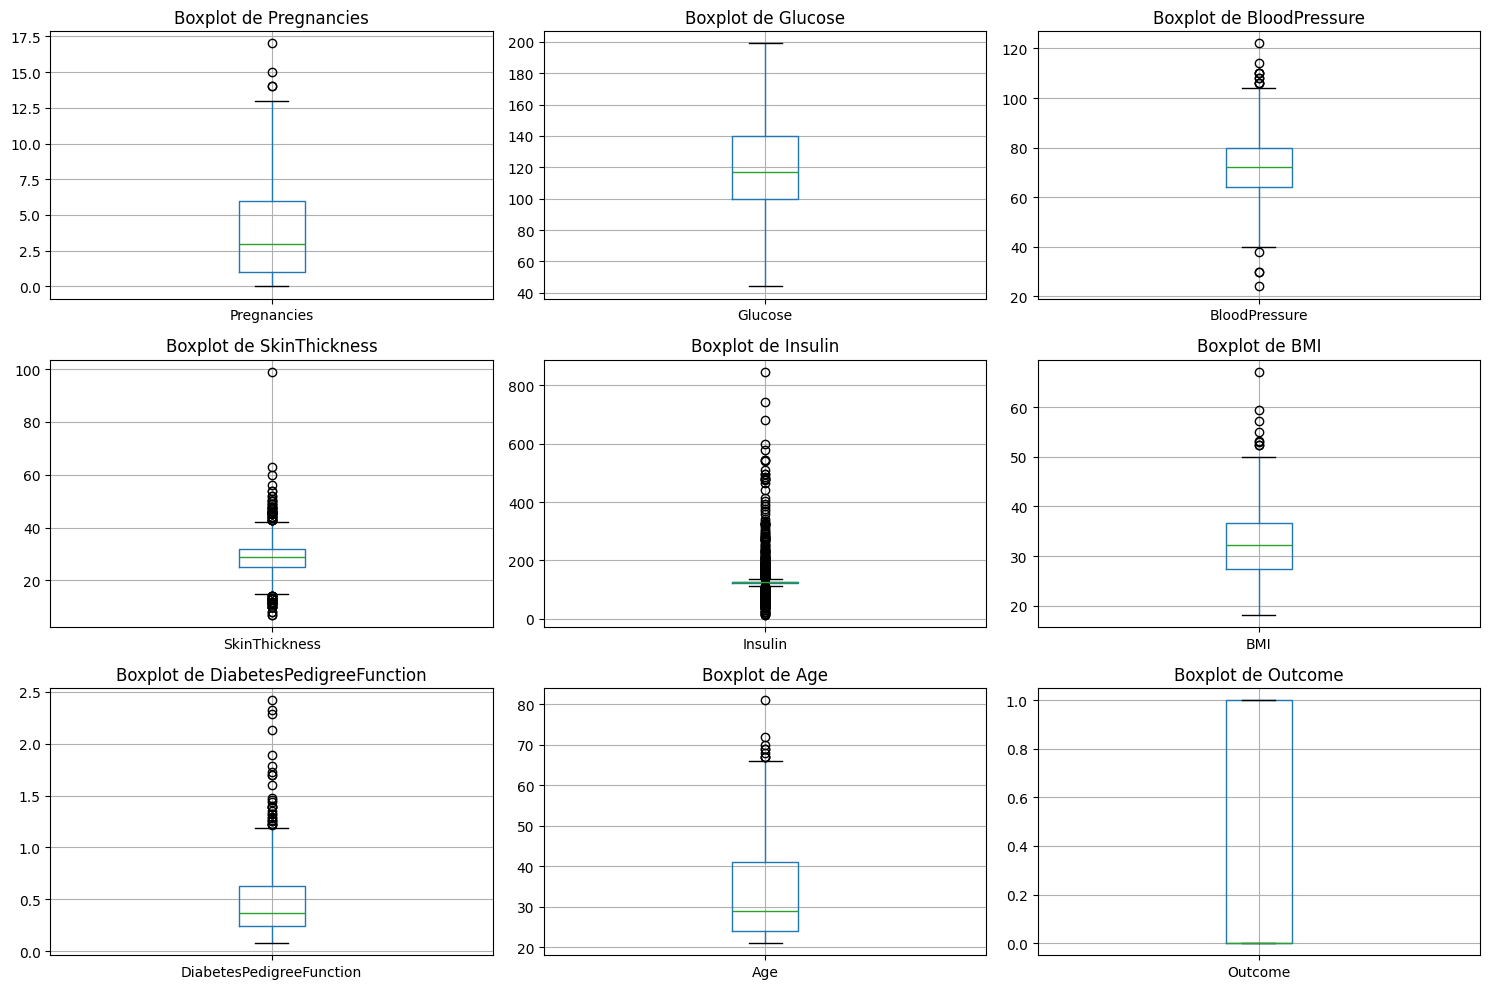

In [240]:
import matplotlib.pyplot as plt

# Variables numéricas
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Crear boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    df.boxplot(column=col)
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


**Pregnancies**

    Algunos outliers > 13 embarazos. Son pocos y médicamente posibles.

    No es necesario intervenir.

**Glucose**

    Unos pocos valores bajos (~45–60) y algunos altos > 180.

    Posibles casos de hipoglucemia o hiperglucemia severa.

    No tocamos por ahora: los árboles pueden manejarlos.

**BloodPressure**

    Ligeros outliers por debajo de 40 y por encima de 100.

    Conservables.

**SkinThickness**

    Bastantes outliers por debajo de 10 y encima de 50-60.

    Esta variable fue muy imputada, así que cuidado con su influencia.

**Insulin**

    Muchos valores extremos (>400), aunque algunos pueden ser reales.

 
     Aunque `Insulin` presenta muchos valores extremos, dado que los árboles de decisión son robustos a outliers no se realizarán transformaciones adicionales. 


**BMI**

    Algunos valores por encima de 50–60, propios de obesidad severa.

    Mantener.

**DiabetesPedigreeFunction**

    Valores altos (>1.5–2.5) son posibles.

    Dejar tal cual.

**Age**

    Algunos outliers por encima de los 70 años. Completamente válidos.

    Sin cambios.

**Outcome**

    Binaria, sin outliers.

**Conclusión:**

    No hay necesidad urgente de tratar los outliers con métodos como winsorización o eliminación. Los árboles de decisión no son sensibles a la escala ni a la presencia de valores extremos

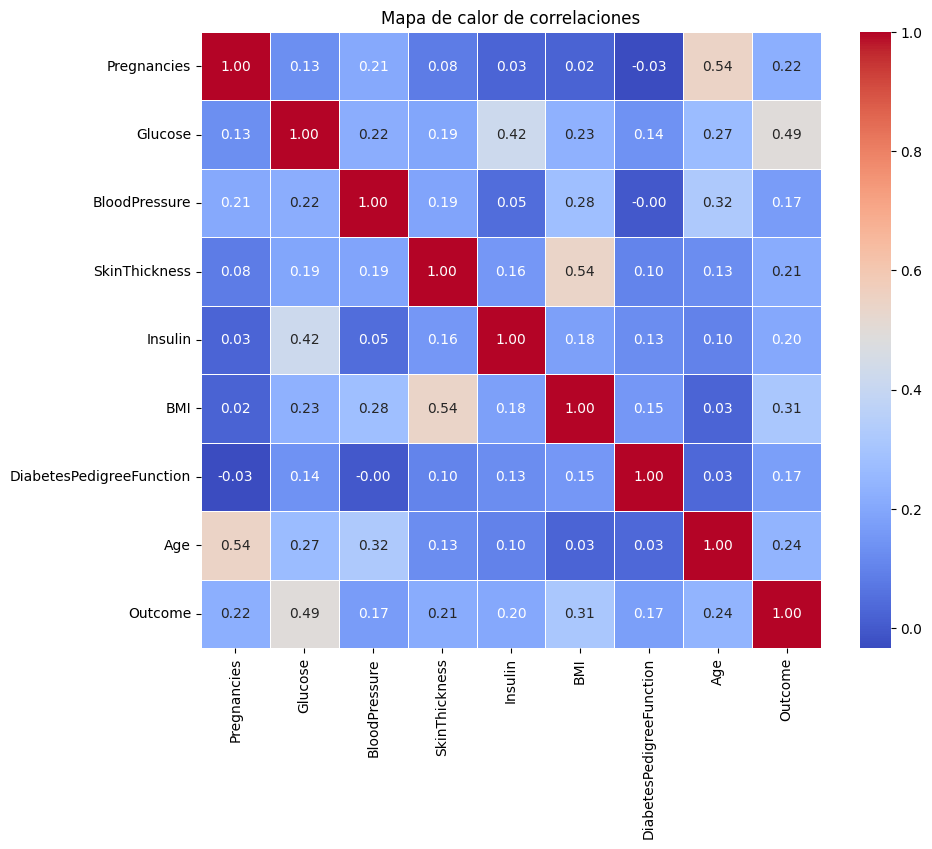

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()


**Correlación con Outcome (objetivo)**

    Glucose → 0.49 →  la más correlacionada

    BMI → 0.31 →  moderada

    Age → 0.24 → relevante

    Pregnancies → 0.22 → también aporta

    Otras variables están por debajo de 0.21 (más débiles)

**Otras correlaciones interesantes**

    SkinThickness y BMI → 0.54 → podrían tener algo de redundancia

    Glucose e Insulin → 0.42

    Age y Pregnancies → 0.54 (lógico: más edad, más embarazos)

**¿Qué hacer con esto?**

El modelo de árbol puede manejar variables correlacionadas, lo dejamos cómo está

**Top variables más correlacionadas con Outcome:**

Ordenadas de mayor a menor:

    Glucose → 0.49

    BMI → 0.31

    Age → 0.24

    Pregnancies → 0.22

    SkinThickness → 0.21

    Insulin → 0.20

    BloodPressure → 0.17

    DiabetesPedigreeFunction → 0.17

In [242]:
# Selección de características

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

## 2. Preparación de los datos:

In [211]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [212]:
#Selecciona las 7 mejores variables:
selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

SelectKBest(k=7)

In [213]:
selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns)

In [214]:
print(" Columnas seleccionadas:")
print(selected_columns)


 Columnas seleccionadas:
Index(['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


**Conclusión:**

    ¡6 de las 7 variables coinciden! 

    La única diferencia es que SelectKBest eligió DiabetesPedigreeFunction en vez de BloodPressure, aunque ambas tienen correlación ~0.17 → puede deberse a que SelectKBest usa otro criterio (como ANOVA F-score).

Esto demuestra que nuestra selección está muy alineada con las variables más informativas, tanto desde el punto de vista estadístico como práctico.

In [215]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90,62,12,43,27.2,0.580,24
711,5,126,78,27,22,29.6,0.439,40
373,2,105,58,40,94,34.9,0.225,25
46,1,146,56,0,0,29.7,0.564,29
682,0,95,64,39,105,44.6,0.366,22


In [216]:
X_test_sel.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7.0,159.0,0.0,0.0,27.4,0.294,40.0
1,10.0,68.0,23.0,49.0,35.5,0.285,47.0
2,2.0,122.0,27.0,200.0,35.9,0.483,26.0
3,7.0,114.0,0.0,0.0,27.4,0.732,34.0
4,2.0,74.0,0.0,0.0,0.0,0.102,22.0


In [217]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values

In [218]:
import os

# Crear la carpeta si no existe:
os.makedirs("../data/processed", exist_ok=True)

# Guardar los datasets:
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

## 3. Árbol de decisión base:

In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar el modelo
model_sel = DecisionTreeClassifier(random_state=42)
model_sel.fit(X_train_sel, y_train)

DecisionTreeClassifier(random_state=42)

In [220]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,90.0,12.0,43.0,27.2,0.580,24.0,0
1,5.0,126.0,27.0,22.0,29.6,0.439,40.0,0
2,2.0,105.0,40.0,94.0,34.9,0.225,25.0,0
3,1.0,146.0,0.0,0.0,29.7,0.564,29.0,0
4,0.0,95.0,39.0,105.0,44.6,0.366,22.0,0


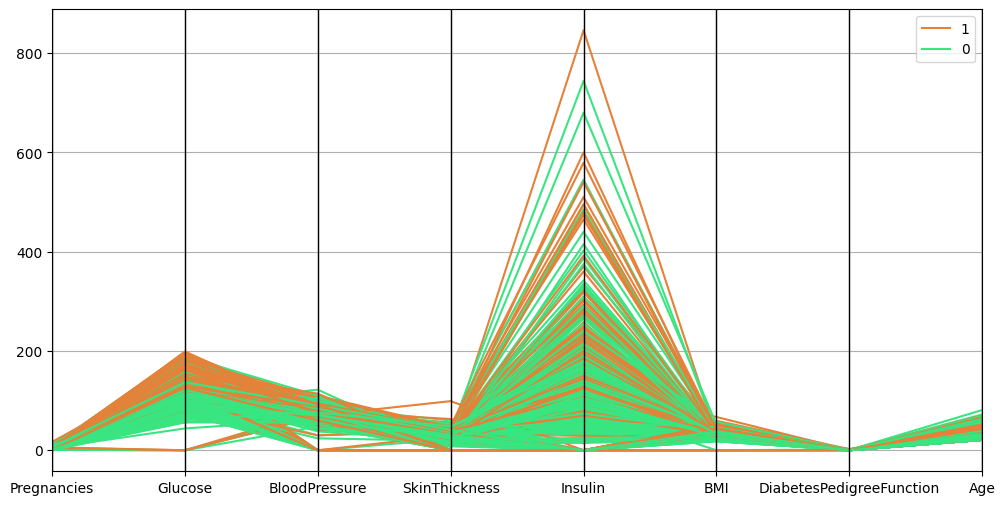

In [221]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

Sin escalar los datos, las variables como Insulin y Glucose dominan visualmente por tener valores mucho más altos que otras como DiabetesPedigreeFunction o Pregnancies.

Probar este mismo gráfico pero con escalado (MinMaxScaler), para:

    Igualar el rango de todas las variables (0 a 1).

    Ver con mayor claridad las diferencias entre clases en cada eje

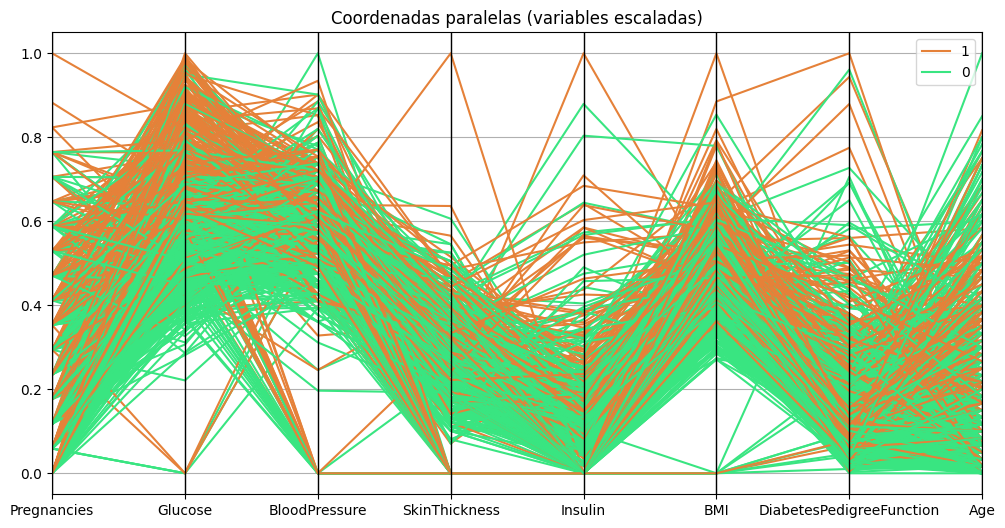

In [222]:
from sklearn.preprocessing import MinMaxScaler

# Copiar los datos
data_scaled = total_data.copy()

# Escalar las variables predictoras (no Outcome)
scaler = MinMaxScaler()
features = data_scaled.columns.drop('Outcome')
data_scaled[features] = scaler.fit_transform(data_scaled[features])

# Volver a graficar
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data_scaled, "Outcome", color=("#E58139", "#39E581", "#8139E5"))
plt.title("Coordenadas paralelas (variables escaladas)")
plt.show()


**Observaciones interesantes:**

    Las líneas naranjas (Outcome = 1, diabetes positiva) suelen estar:

        Más altas en Glucose, BMI, Insulin y en parte también Age.

        Esto sugiere que los pacientes con diabetes tienen valores mayores en esas variables.

    Las líneas verdes (Outcome = 0) están más concentradas en valores bajos o medios.

    Variables como BloodPressure, SkinThickness y DiabetesPedigreeFunction no muestran una separación tan clara, pero aún pueden aportar información en conjunto.

**Conclusión visual:**



    Glucose, BMI, Insulin y Age son muy relevantes.

    Otras pueden tener menos peso, pero no necesariamente son inútiles.

In [223]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [224]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

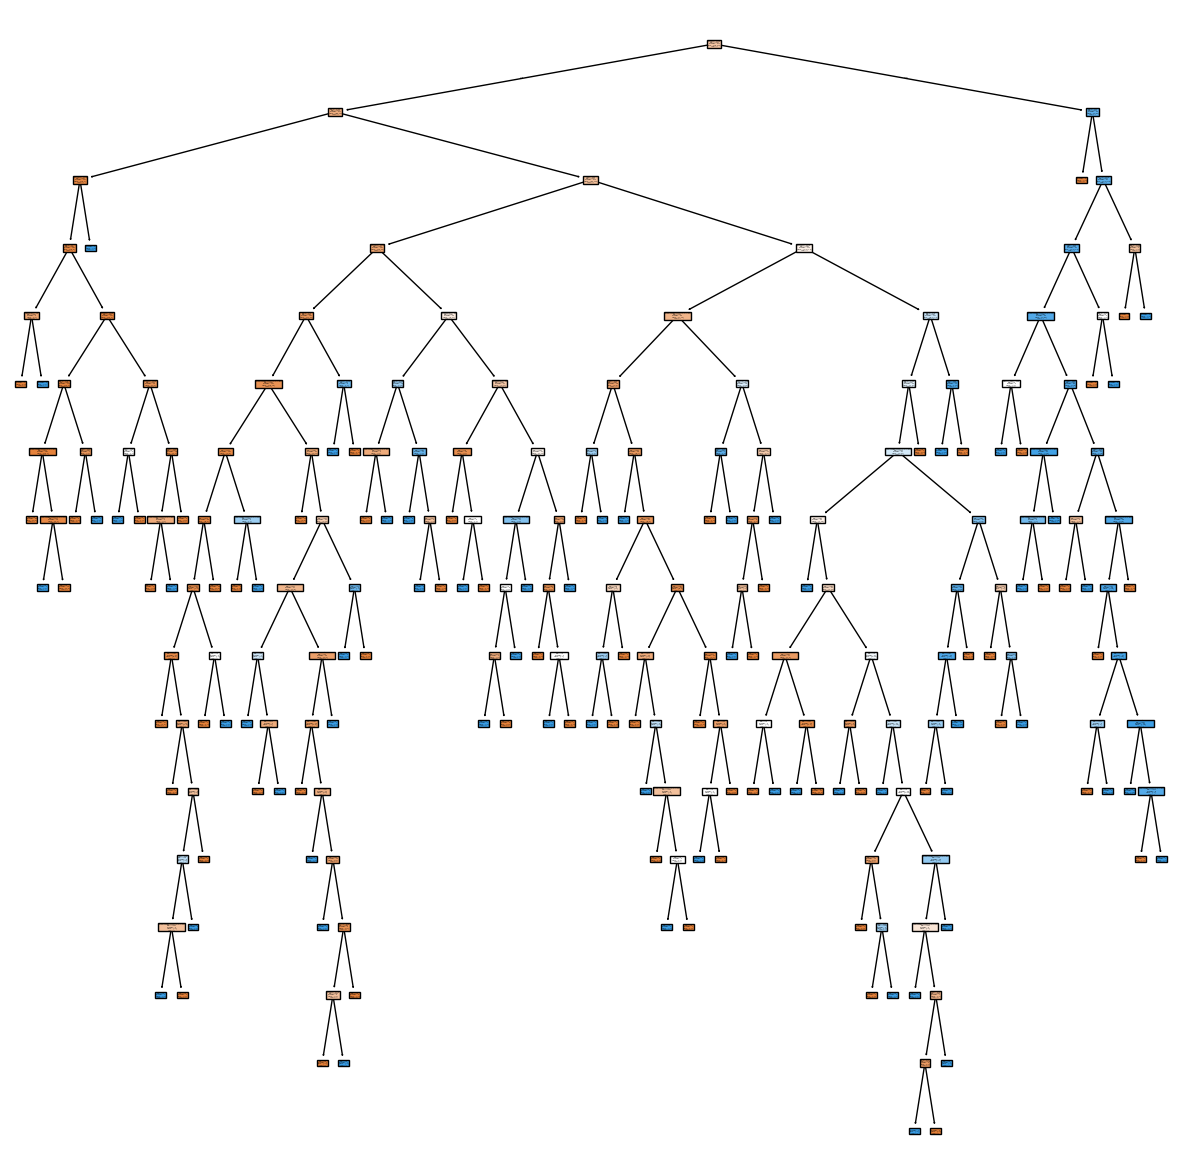

In [225]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))

tree.plot_tree(
    model,
    feature_names=list(X_train.columns),
    class_names=["0", "1"], 
    filled=True
)

plt.show()


In [226]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [227]:

# Predecir sobre el conjunto de test
y_test_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predecir
y_test_pred = model.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Mostrar resultados
print("📈 Métricas en el conjunto de Test:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")




📈 Métricas en el conjunto de Test:
Accuracy : 0.69
Precision: 0.57
Recall   : 0.46
F1-Score : 0.51


In [228]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Modelo base sin restricciones
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(X_train, y_train)

# Predicciones
y_train_pred = base_model.predict(X_train)
y_test_pred = base_model.predict(X_test)

# Métricas
metrics = {
    "Dataset": ["Train", "Test"],
    "Accuracy": [
        accuracy_score(y_train, y_train_pred),
        accuracy_score(y_test, y_test_pred)
    ],
    "Precision (1)": [
        precision_score(y_train, y_train_pred),
        precision_score(y_test, y_test_pred)
    ],
    "Recall (1)": [
        recall_score(y_train, y_train_pred),
        recall_score(y_test, y_test_pred)
    ],
    "F1-score (1)": [
        f1_score(y_train, y_train_pred),
        f1_score(y_test, y_test_pred)
    ]
}

# Mostrar tabla
df_metrics = pd.DataFrame(metrics)
print(df_metrics)


  Dataset  Accuracy  Precision (1)  Recall (1)  F1-score (1)
0   Train  1.000000       1.000000    1.000000      1.000000
1    Test  0.688312       0.568182    0.462963      0.510204


Como se observa, el modelo aprende perfectamente los datos de entrenamiento, pero pierde capacidad de generalización en el conjunto de prueba. Esto es un caso claro de overfitting, lo cual justifica la necesidad de optimización.

## 4. Optimización con GridSearchCV:

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir hiperparámetros a buscar
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Configurar GridSearchCV
grid = GridSearchCV(model, hyperparams, scoring="accuracy", cv=10)


In [230]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


In [231]:
grid.fit(X_train, y_train)
print(f"Best hyperparameters: {grid.best_params_}")


Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [232]:
best_model = grid.best_estimator_

## 5. Evaluación del modelo optimizado:

In [233]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

y_test_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1:", f1_score(y_test, y_test_pred))

Accuracy: 0.7857142857142857
Precision: 0.7058823529411765
Recall: 0.6666666666666666
F1: 0.6857142857142857


## 6. Visualización del árbol:

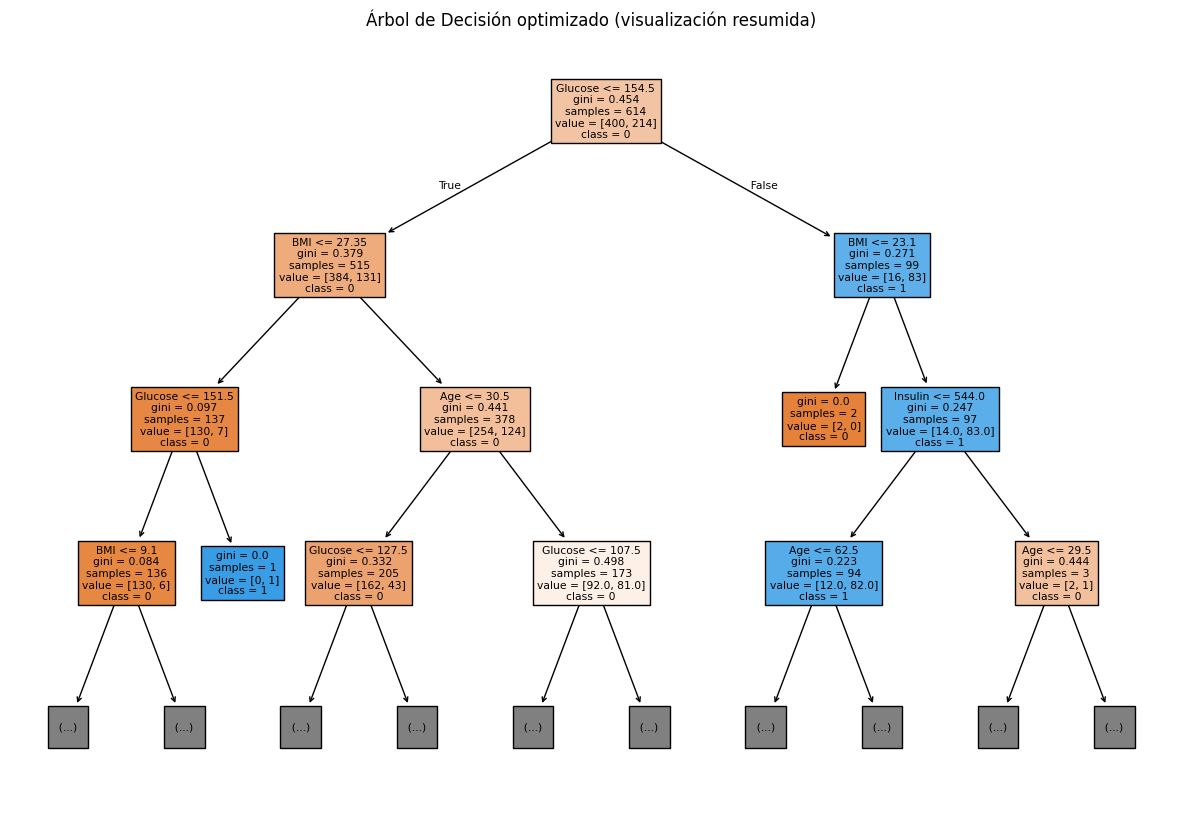

In [234]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
tree.plot_tree(
    best_model,
    feature_names=X_train.columns,
    class_names=["0", "1"],  # 0: no diabetes, 1: diabetes
    filled=True,
    max_depth=3  # 👈 Limita la visualización a los primeros 3 niveles
)
plt.title("Árbol de Decisión optimizado (visualización resumida)")
plt.show()


## 7. Importancia de las variables:

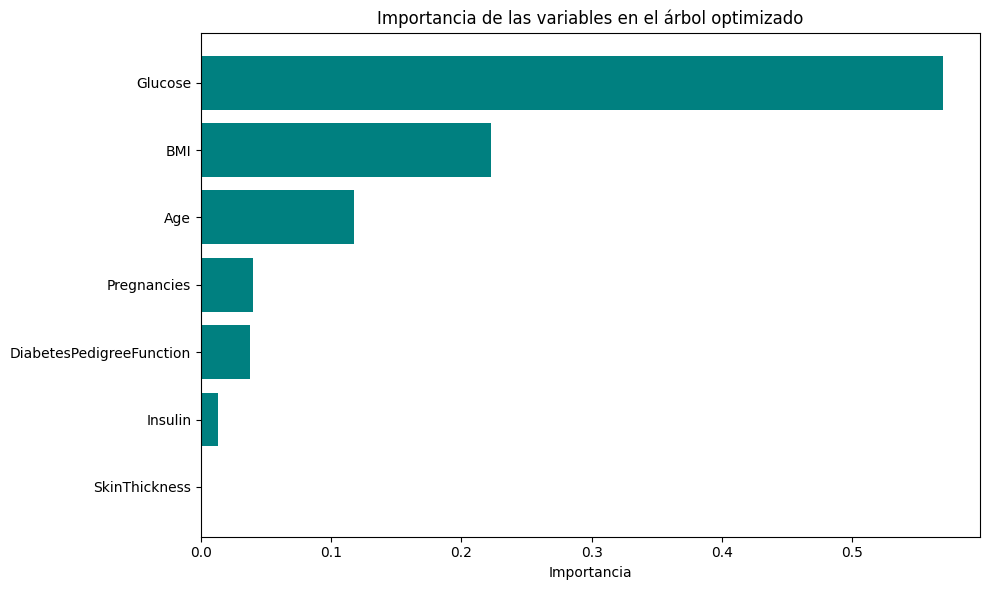

In [235]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obtener importancias desde el modelo
importances = best_model.feature_importances_
features = X_train.columns

# Crear un DataFrame ordenado
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='teal')
plt.xlabel('Importancia')
plt.title('Importancia de las variables en el árbol optimizado')
plt.gca().invert_yaxis()  # Poner la más importante arriba
plt.tight_layout()
plt.show()


## 8. Conclusiones Finales del Proyecto:

Se realizó una correcta imputación de valores inválidos, permitiendo conservar el máximo de datos posibles.

El árbol de decisión base sufrió de overfitting (100% en entrenamiento, 69% en test).

La optimización de hiperparámetros mediante GridSearchCV permitió mejorar significativamente el rendimiento:

Accuracy: 78.57%

Recall clase 1: 66.67%

F1-score clase 1: 68.57%

Las variables más importantes para la predicción fueron Glucose, BMI, Age e Insulin, consistentes con conocimientos médicos.

El modelo final es interpretable, robusto y puede ser utilizado como base para integrar modelos más complejos en el futuro.

## 9.  Guardado del modelo optimizado:

In [247]:
import os
os.makedirs("../models", exist_ok=True)

from pickle import dump
dump(best_model, open("../models/tree_classifier_crit-gini_maxdepth-5_minleaf-1_minsplit-2_42.sav", "wb"))
